In [2]:
import numpy as np
import pandas as pd


In [3]:
data = pd.read_csv('dataset/Crop.csv')

In [4]:
print(f'Shape of dataset: {data.shape}')
data.head(5)

Shape of dataset: (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
# check missing values
# if ever encountered with nul values then use fillna() funtion to fill the null cells with mean or median or mode
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
# check for duplicate values
data.duplicated().sum()

0

In [8]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


#Exploratory data analysis

In [28]:
# corelation
cor = data.corr()
cor


,N,P,K,temperature,humidity,ph,rainfall,crop_num
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,0.282787
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.167951
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,0.143703
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,0.180571
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,0.524452
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,0.052389
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.121486
crop_num,0.282787,-0.167951,0.143703,0.180571,0.524452,0.052389,0.121486,1.000000


###positive corelarion
A positive correlation exists when one variable decreases as the other variable decreases, or one variable increases while the other increases.

###negative corelation
A negative correlation is a relationship between two variables such that as the value of one variable increases, the other decreases.


In [10]:
# ploting heatmap with respect to corelation
import seaborn as sns
# sns.heatmap(cor,annot=True , cbar=True , cmap='coolwarm' )
# print('red color indicates positive corelation \ndark blue indicates negative corelation')

In [11]:
# check for types of crops
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

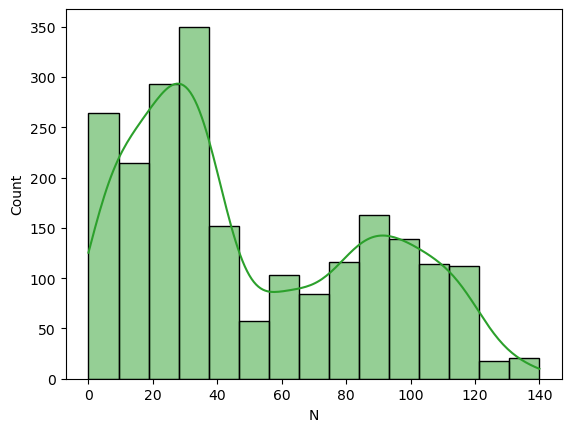

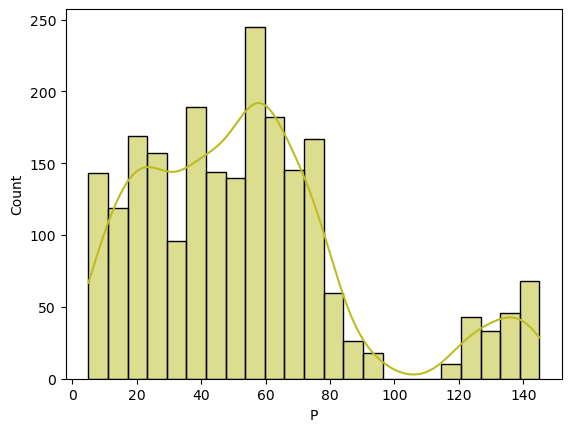

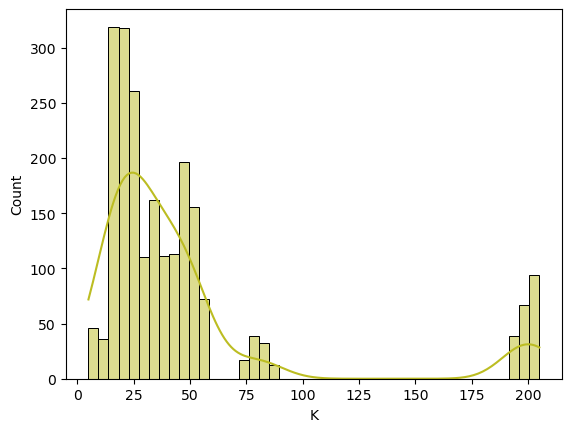

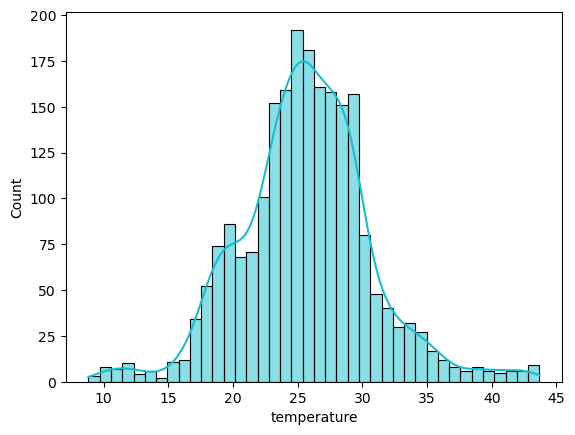

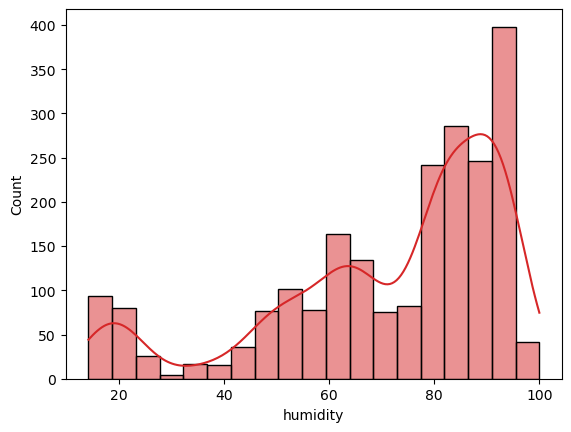

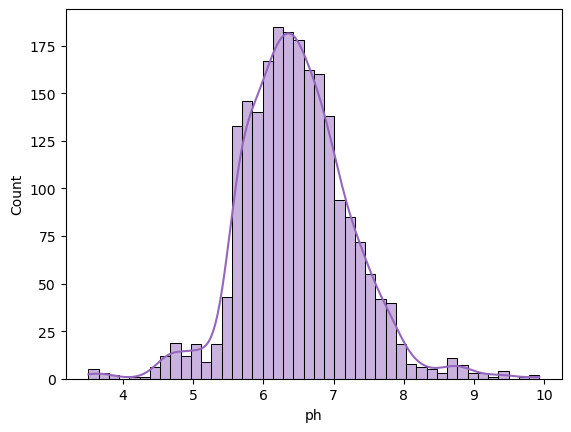

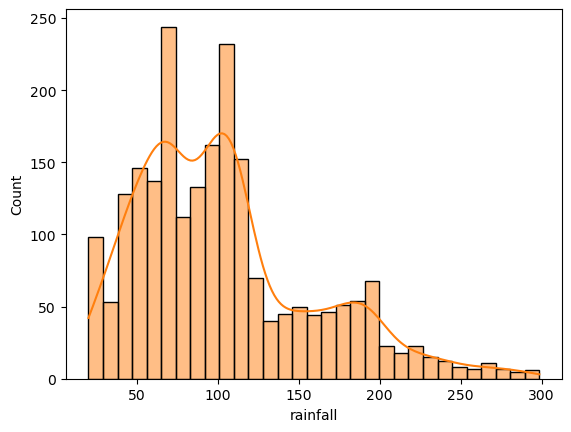

In [12]:
# check for distribution of conditions
import matplotlib.pyplot as plt
import random as rd

data_columns = list(data.columns)
colors=list(sns.color_palette())

for i in data_columns[:-1]:
  sns.histplot(data[i] , color=rd.choice(colors) , kde=True)
  plt.show()

#Encoding labelled data

In [13]:
# creating a dictionary from data['label'] to convert into numerical value
crop_dict = {}
label_list = list(data['label'].unique())
for i in label_list :
  crop_dict[i] = label_list.index(i)+1
crop_dict

{'rice': 1,
 'maize': 2,
 'chickpea': 3,
 'kidneybeans': 4,
 'pigeonpeas': 5,
 'mothbeans': 6,
 'mungbean': 7,
 'blackgram': 8,
 'lentil': 9,
 'pomegranate': 10,
 'banana': 11,
 'mango': 12,
 'grapes': 13,
 'watermelon': 14,
 'muskmelon': 15,
 'apple': 16,
 'orange': 17,
 'papaya': 18,
 'coconut': 19,
 'cotton': 20,
 'jute': 21,
 'coffee': 22}

In [14]:
data['crop_num']  = data['label'].map(crop_dict)

In [15]:
data.drop(['label'] , axis =1 ,inplace=True)

In [16]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_num
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


#Train Test Split

In [17]:
# input variable
X = data.drop(['crop_num'] , axis=1)
print(f'shape of input variable = {X.shape}')
# output variable
y = data['crop_num']
print(f'shape of output variable = {y.shape}')

shape of input variable = (2200, 7)
shape of output variable = (2200,)


In [18]:
from sklearn.model_selection import train_test_split
# splitting dataset in 80:20 ratio (80 for training 20 for testing)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [19]:
print(f'shape of x train = {X_train.shape}')
print(f'shape of x test = {X_test.shape}')

shape of x train = (1760, 7)
shape of x test = (440, 7)


#Scale feature using minmaxScaler

In [20]:
# from sklearn.preprocessing import MinMaxScaler as ms
# ms.fit(X_train)
# X_train = ms.transform(X_train)

# X_test = ms.transform(X_test)


#Scaling using standardScaler

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)

X_test = sc.transform(X_test)


In [22]:
# standardized data
X_train


array([[-9.03426596e-01, -1.12616170e+00, -6.68506601e-01, ...,
         9.36586183e-01,  1.93473784e-01,  5.14970176e-03],
       [-3.67051340e-01,  7.70358846e-01, -5.70589522e-01, ...,
        -1.00470485e-01,  8.63917548e-01, -6.05290566e-01],
       [-1.17161422e+00,  5.89737842e-01, -4.53089028e-01, ...,
        -3.82774991e-01,  1.05029771e+00, -1.04580687e+00],
       ...,
       [-1.06433917e+00, -5.24091685e-01, -3.35588533e-01, ...,
        -8.98381379e-01, -6.34357580e-04, -4.37358211e-02],
       [-1.06433917e+00,  2.12501638e+00,  3.05234239e+00, ...,
         3.86340190e-01, -1.48467347e-01, -5.69036842e-01],
       [-5.01145154e-01,  7.40255346e-01, -5.11839275e-01, ...,
        -4.18045489e-01,  6.86860180e-01, -8.96531475e-01]])

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score,precision_score

models = {
    'lg' : LogisticRegression(),
    'gnb': GaussianNB(),
    'knn': KNeighborsClassifier(),
    'dt' : DecisionTreeClassifier(),
    'svm': SVC(),
    'rf' : RandomForestClassifier()
}
accuracy_values = {}
precision_values = {}
for name , model in models.items():
      # training model
    model.fit(X_train , y_train)
      # predicting output using test input
    y_pred = model.predict(X_test)

  # printing accuracy
    print(model)
    print(f'accuracy = {accuracy_score(y_test , y_pred)}')
    print(f'precision = {precision_score(y_test, y_pred, average="macro" )}\n\n')
    accuracy_values[name] = accuracy_score(y_test , y_pred)
    precision_values[name] = precision_score(y_test , y_pred , average = 'macro')
print(f'\n model with max accuracy:  {max(zip(accuracy_values.values(), accuracy_values.keys()))[1]} \n score : {accuracy_values[max(zip(accuracy_values.values(), accuracy_values.keys()))[1]]}')
print(f'\n model with max precision:  {max(zip(precision_values.values(), precision_values.keys()))[1]} \n score : {precision_values[max(zip(precision_values.values(), precision_values.keys()))[1]]}')


print(f'\n model with min accuracy:  {min(zip(accuracy_values.values(), accuracy_values.keys()))[1]} \n score : {accuracy_values[min(zip(accuracy_values.values(), accuracy_values.keys()))[1]]}')
print(f'\n model with min precision:  {min(zip(precision_values.values(), precision_values.keys()))[1]} \n score : {precision_values[min(zip(precision_values.values(), precision_values.keys()))[1]]}')

LogisticRegression()
accuracy = 0.9636363636363636
precision = 0.962322889206172


GaussianNB()
accuracy = 0.9954545454545455
precision = 0.9963636363636365


KNeighborsClassifier()
accuracy = 0.9659090909090909
precision = 0.9657485656289485


DecisionTreeClassifier()
accuracy = 0.9818181818181818
precision = 0.9808244785517513


SVC()
accuracy = 0.9681818181818181
precision = 0.967729240456513


RandomForestClassifier()
accuracy = 0.9931818181818182
precision = 0.9925757575757576



 model with max accuracy:  gnb 
 score : 0.9954545454545455

 model with max precision:  gnb 
 score : 0.9963636363636365

 model with min accuracy:  lg 
 score : 0.9636363636363636

 model with min precision:  lg 
 score : 0.962322889206172


In [24]:
gnb = GaussianNB()
gnb.fit(X_train , y_train)
y_pred = gnb.predict(X_test)

accuracy_score(y_test , y_pred)

0.9954545454545455

#Predictive system

In [25]:
def recommendation(N , P , K, temperature ,humidity, ph , rainfall):
  feature = np.array([[N , P , K, temperature ,humidity ,ph , rainfall]])
  prediction = gnb.predict(feature).reshape(1,-1)
  return prediction[0]


In [26]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'crop_num'], dtype='object')

In [29]:
N=80
P = 40
K = 60
temperature = 30
humidity = 70
ph = 6
rainfall = 0

predict = recommendation(N , P , K, temperature, humidity, ph , rainfall)

if predict[0] in crop_dict.values():
  value = [i for i in crop_dict if crop_dict[i] == predict[0]]
  print(value)
  print(f' most suitable crop for provided feature is {value[0]}')
else:
  print('sorry no crop found for provided feature ')

['jute']
 most suitable crop for provided feature is jute
